# GENERAL ADDITIVE MODELS

In [1]:
install.packages("dplyr", verbose = FALSE)
install.packages("ggplot2", verbose = FALSE)
install.packages("vtreat", verbose = FALSE)
install.packages("tidyverse", verbose = FALSE)
install.packages("WVPlots", verbose = FALSE)

library(dplyr, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(vtreat, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(WVPlots, quietly = TRUE)

Warning message in install.packages("dplyr", verbose = FALSE):
“installation of package ‘dplyr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("tidyverse", verbose = FALSE):
“installation of package ‘tidyverse’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Conflicts with tidy packages --------------------------------

In [55]:
install.packages("mgcv")
library(mgcv)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: nlme

Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

This is mgcv 1.8-22. For overview type 'help("mgcv-package")'.


### Create the data

In [158]:
# Inputs
hoursHW <- c(   01, 02, 04, 05, 06, 07, 08, 08, 09, 10,
                11, 12, 16, 18, 20, 20, 20, 21, 21, 22, 
                24, 24, 24, 24, 25, 27, 28, 29, 30, 30)

error <- round(runif(30, 0, 30), digits=0)


# Output
schoolAnx <- c( 04, 10, 10, 11, 13, 20, 16, 14, 10, 13,
                19, 21, 10, 20, 40, 42, 47, 80, 65, 72,
                72, 75, 73, 19, 75, 80, 82, 78, 95, 81)


# Dataframe
SDF <- data.frame(hoursHW, schoolAnx)
tail(SDF)

,hoursHW,schoolAnx
25,25,75
26,27,80
27,28,82
28,29,78
29,30,95
30,30,81


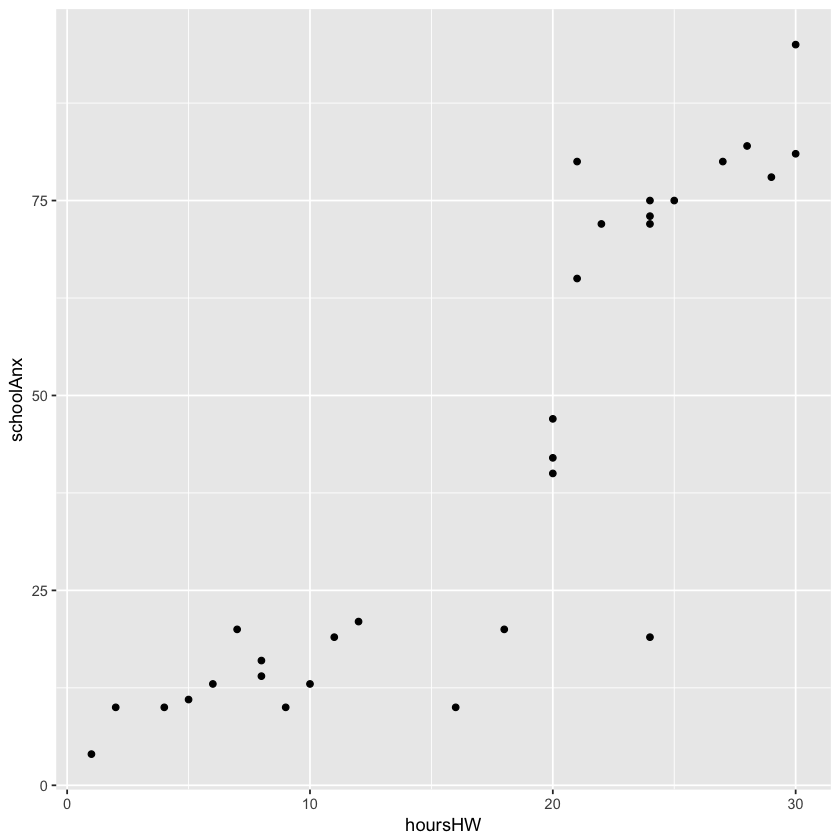

In [159]:
ggplot(SDF, aes(x = hoursHW, y = schoolAnx)) +
    geom_point()

In [160]:
model <- gam(schoolAnx ~ s(hoursHW), data = SDF, family = gaussian)

summary(model)


Family: gaussian 
Link function: identity 

Formula:
schoolAnx ~ s(hoursHW)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.233      2.451   17.23  6.4e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df     F  p-value    
s(hoursHW) 2.494  3.105 40.37 2.68e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.811   Deviance explained = 82.8%
GCV = 204.02  Scale est. = 180.26    n = 30

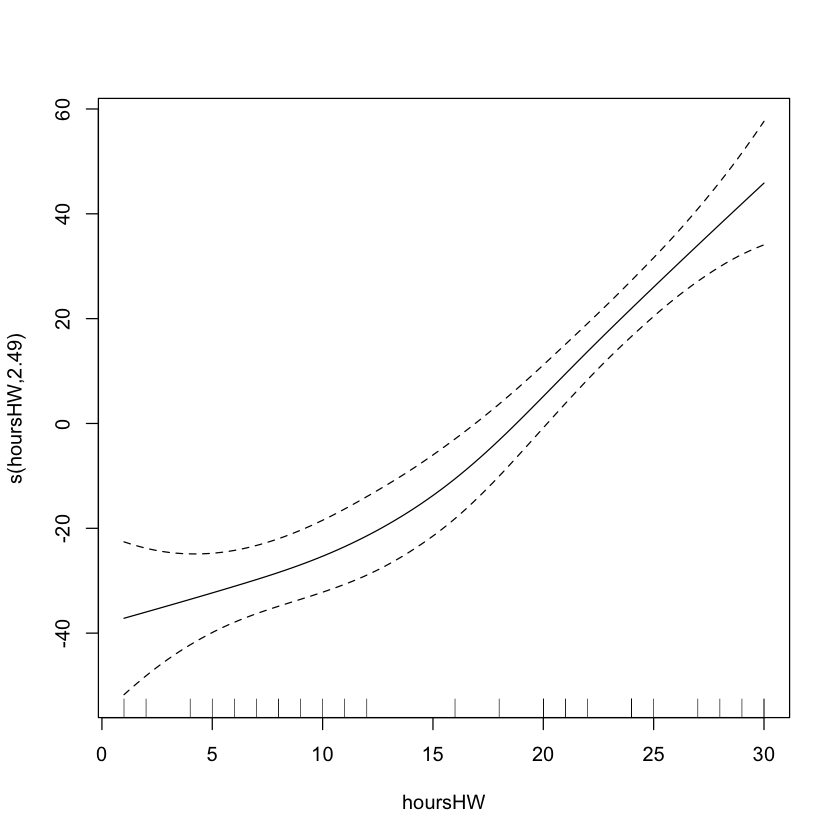

In [161]:
plot(model)

### The plot above depicts the polynomial spline of the general additive model

### Predict with GAM

In [162]:
# Get predictions from linear model
modelLM <- lm(schoolAnx ~ hoursHW, data = SDF)
SDF$predLM <- predict(modelLM, newdata = SDF)

# Get predictions from gam model
SDF$predGAM <- predict(model, newdata = SDF)

In [163]:
head(SDF)

hoursHW,schoolAnx,predLM,predGAM
1,4,-5.548733,5.069792
2,10,-2.537258,6.262785
4,10,3.485691,8.678849
5,11,6.497166,9.910426
6,13,9.508641,11.162402
7,20,12.520116,12.449137


In [168]:
# Gather the predictions into a "long" dataset
SDF_long <- SDF %>%
    gather(key = modeltype, value = predictions, predGAM, predLM)

head(SDF_long, 3)


Warning message:
“attributes are not identical across measure variables; they will be dropped”

hoursHW,schoolAnx,modeltype,predictions
1,4,predGAM,5.069792
2,10,predGAM,6.262785
4,10,predGAM,8.678849


In [165]:
# Calculate the RMSE
SDF_long %>%
    mutate(residual = schoolAnx - predictions) %>%
    group_by(modeltype) %>%
    summarize(rmse = sqrt(mean(residual^2)))

modeltype,rmse
predGAM,12.61982
predLM,14.09332


The RMSE ("Root Mean Squared Error") is a measure of the model fit to the data. A lower RMSE is generally associated with a better model. Here, we see that the predictions the GAM (General Additive Model) makes is better than the predictions the linear model makes. Our GAM model is the way to go!

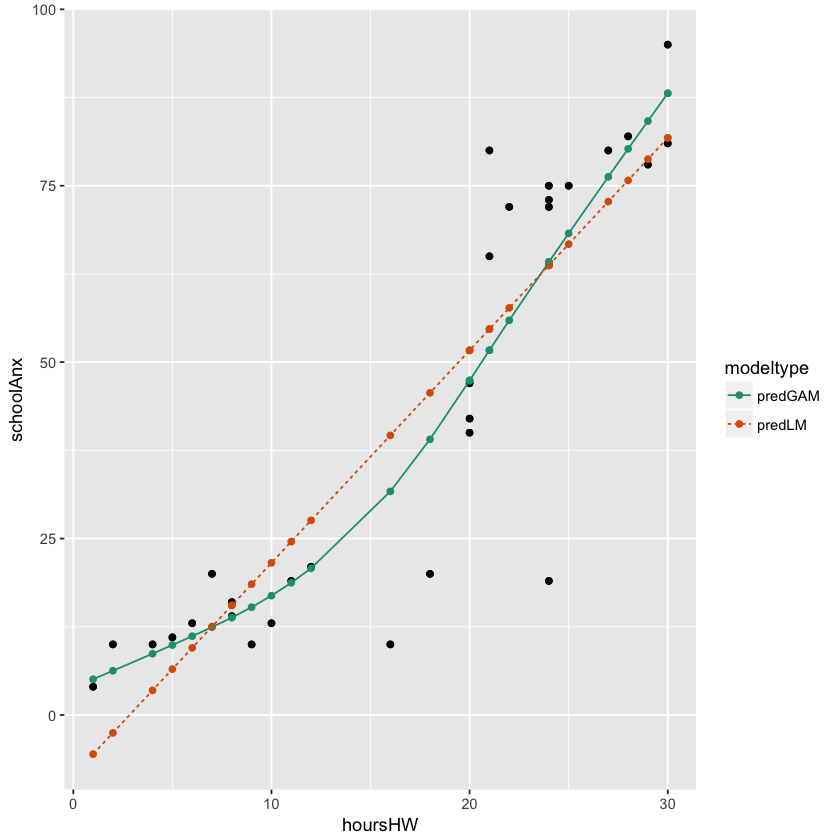

In [173]:
# Compare predictions against actual anxiety levels
SDF_long %>%
    ggplot(aes(x = hoursHW)) +
    geom_point(aes(y = schoolAnx)) +
    geom_point(aes(y = predictions, color = modeltype)) +
    geom_line(aes(y = predictions, color = modeltype, linetype = modeltype))+
    scale_color_brewer(palette = "Dark2")